We know that machine learning is essentially about learning a function g to approximate a real functional relationship f. The two mainstream function approximation methods today are

Neural Networks (NNs)
Bayesian inference for stochastic processes, and most commonly Gaussian Processes (GPs).
I will briefly describe these two methods next.

Reference Link：
https://zhuanlan.zhihu.com/p/668010494

# Prior Probability:

In Bayesian Terms: The prior probability represents your initial belief or uncertainty about the parameters of the model before observing any data. It is based on existing knowledge or assumptions.
In the Code: The choice of the Gaussian Process kernel (Radial Basis Function in this case) and its hyperparameters (like length scales) serves as the prior. It encodes assumptions about the smoothness and behavior of the underlying function.

# Likelihood:

In Bayesian Terms: The likelihood represents the probability of observing the data given a particular set of model parameters. It quantifies how well the model explains the observed data.
In the Code: The likelihood is implicitly defined in the Gaussian Process model during the fitting process (gp.fit(X, y)). It is the likelihood of observing the data given the specified GP model parameters.

# Posterior Probability:

In Bayesian Terms: The posterior probability is the updated probability of the parameters given both the prior information and the observed data. It is obtained by combining the prior probability and the likelihood through Bayes' theorem.
In the Code: The Gaussian Process is fit to the data, and the model parameters are optimized based on the observed data. The resulting GP model, after fitting, represents the posterior distribution over functions given the observed data.

# Marginal Probability:

In Bayesian Terms: The marginal probability is obtained by integrating the joint probability distribution over some subset of variables to obtain the probability distribution of the variables of interest.
In the Code: The marginal likelihood, also known as the evidence, is implicitly calculated during the optimization process when fitting the Gaussian Process (gp.fit(X, y)). It represents the likelihood of the observed data under the GP model, marginalized over all possible function values.


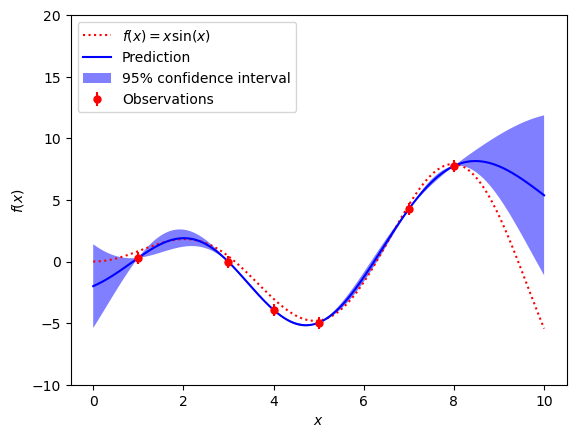

In [3]:
# Let's provide a code example using a Gaussian Process for a regression problem with the scikit-learn library in Python.

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import numpy as np
import matplotlib.pyplot as plt

# Define a function to model (for example purposes)
def f(x):
    return x * np.sin(x)

# Generate some data based on the function and add noise
X = np.atleast_2d([1., 3., 4., 5., 7., 8.]).T
y = f(X).ravel() + np.random.normal(0, 0.5, X.shape[0])

# Specify Gaussian Process with a Radial Basis Function (RBF) kernel, also known as the "squared exponential" kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
x = np.atleast_2d(np.linspace(0, 10, 1000)).T
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\sin(x)$')
plt.errorbar(X.ravel(), y, 0.5, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

# Show plot
plt.show()

In [2]:
import numpy as np

# Original list of numbers
original_list = [1., 3., 5., 6., 7., 8.]

# Using atleast_2d to create a 2D array
X_2d = np.atleast_2d(original_list).T

# Transposing to create a column vector
X_column_vector = X_2d.T

# Using ravel to flatten the array
X_flattened = X_2d.ravel()

# Print the results
print("Original List:", original_list)
print("2D Array (Transposed):", X_2d)
print("Column Vector:", X_column_vector)
print("Flattened Array:", X_flattened)


Original List: [1.0, 3.0, 5.0, 6.0, 7.0, 8.0]
2D Array (Transposed): [[1.]
 [3.]
 [5.]
 [6.]
 [7.]
 [8.]]
Column Vector: [[1. 3. 5. 6. 7. 8.]]
Flattened Array: [1. 3. 5. 6. 7. 8.]
